# Simulering av radioaktiv nedbrytning
Av Sigurd Rage - USN

![Terningkast som simulering av radioaktiv nedbrytning](images/terningkast.jpg)

# Introduksjon
I denne aktiviteten ser vi på hvordan vi kan simulere radioaktiv nedbrytning med terninger og programmering. Den tar utgangspunkt i et klassisk forsøk der elevene bruker terninger for å simulere radioaktiv nedbrytning, samler data og analyserer resultatene i CAS-verktøy (Geogebra) og vurderer resultatet mot en matematisk modell. Deretter tas problemet videre i en programmeringsoppgave.

Aktiviteten passer best for elever på 10. trinn og dekker flere aktuelle kompetansemål fra både 9. og 10. trinn. Den kan også fungere som tverrfaglig oppgave med naturfag

# Kompetansemål
Matematikk 9. trinn
* berekne og vurdere sannsyn i statistikk og spel
* simulere utfall i tilfeldige forsøk og berekne sannsynet for at noko skal inntreffe, ved å bruke programmering

Matematikk 10. trinn
* bruke funksjonar i modellering og argumentere for framgangsmåtar og resultat
* modellere situasjonar knytte til reelle datasett, presentere resultata og argumentere for at modellane er gyldige
* utforske matematiske eigenskapar og samanhengar ved å bruke programmering
* utforske samanhengen mellom konstant prosentvis endring, vekstfaktor og eksponentialfunksjonar
* utforske og samanlikne eigenskapar ved ulike funksjonar ved å bruke digitale verktøy

Naturfag 10. trinn
* bruke programmering til å utforske naturfaglige fenomener
* bruke og lage modeller for å forutsi eller beskrive naturfaglige prosesser og systemer og gjøre rede for modellenes styrker og begrensninger

# Analog aktivitet

## Arbeid med teoretisk modell
Elevene jobber seg fram til en modell for forsøket. Siden sannsynligheten for å få en sekser på terningen er $ P = \frac{1}{6} $ vil de kunne resonnere seg frem til at sannsynligvis kan $ \frac{1}{6} $ av terningene fjernes for hver runde. En mulig modell for forsøket kan da være eksponentialfunksjonen $$ M(x) = M_0 \cdot \frac{5}{6}^x $$ der $ M_0 $ er mengden terninger ved start.

## Aktivitet med terninger
Elevene deles i grupper og får utdelt et terningssett hver. Dess flere terninger dess bedre, vi hadde 165 terninger i vår gjennomføring. Elevene kaster terningene i runder og fjerner alle terningene som viser 6, og noterer hvor mange terninger de har igjen etter hver runde. Etter 10 runder oppsummeres gruppenes resultater i plenum og vi regner ut totalen for hver runde

## Oppsummering og analyse

![Oppsummering på tavle](images/oppsummering.jpg)

Resultatene legges inn i graftegner og kan analyseres visuelt

![Plott av resultater](images/resultatplott.png)

I neste plott har vi brukt regresjon (RegEksp) og fått en regresjonskurve med funksjonen $ M = 215.7 \cdot 0.74^x $ i grønt.
I tillegg har vi lagt inn den teoretiske sannsynlighetsmodellen $ M = 165 \cdot \frac{5}{6}^x $

![regresjon og teoretisk modell](images/regresjon-modell.png)

Her ser vi at regresjonsfunksjonen ikke likner på den teoretiske modellen, ei heller passer dataene særlig bra inn, så hva har skjedd?

Dette er en fin anledning til at elevene får diskutere.

# Programmering av simulasjonen

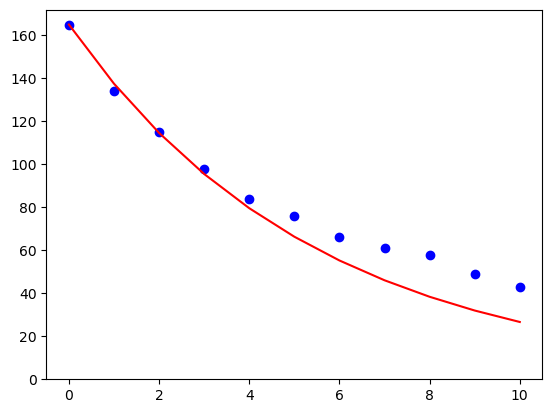

In [10]:
"""
Simulering av decay (feks nedbrytning av radioaktivt materiale)

Created on Wed Jan 15 10:26:58 2025

@author: Sigurd Rage @ University of Southeastern Norway
"""
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

# Antall kjerner ved start
M = 165

# Sannsynlighet for endring av materie
p = 1/6

# antall iterasjoner (sekunder, år?)

N = 10

# tabell for å huske antall restmengde pr iterasjon, og legger til startmengden
tabell = []
tabell.append(M)

# ytre sløyfe pr iterasjon
for i in range(N):
    count = 0
    # indre sløyfe simulerer decay per element i mengden
    for j in range(M):
        if rnd.random() <= p:
            count += 1 # teller antall elementer som endres
    # trekker fra elementene som har endret seg og oppdaterer tabellen
    M -= count
    tabell.append(M)

# lager en x og y-tabell for iterasjon og restmengde (kan skaleres til tid)
x = np.linspace(0, len(tabell)-1, len(tabell))
y = np.array(tabell)

fasit_y = y[0]*(1-p)**x


# plotter resultatet og setter y-aksen slik at den alltid viser 0
f, ax = plt.subplots(1)
ax.plot(x, y, "bo")
ax.plot(x, fasit_y, "r")
ax.set_ylim(ymin=0)
plt.show(f)